# Feature Extraction

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-11-03 00:40:55.779282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-03 00:40:56.259405: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 00:40:57.000098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zach/miniconda3/envs/tf/lib/:/home/zach/miniconda3/envs/tf/lib/python3.10/site-packages/nvidia/cudnn/lib
2023-11-03 00:40:57.000159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

## Load Model

In [2]:
model = keras.applications.VGG16(weights='imagenet', include_top=False)

2023-11-03 00:40:58.169289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 00:40:58.396960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 00:40:58.397130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 00:40:58.398249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_vgg16_features(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

    # Extract features from the desired layer (e.g., block5_pool)
    layer_name = 'block5_pool'  # You can choose a different layer
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    features = intermediate_layer_model.predict(img)

    return features

## Run Model

In [4]:
import os

img_dir = "/home/zach/PycharmProjects/term7cv/dataset/objects/train_4"

features_dict = {}

for img_name in os.listdir(img_dir):
    feature = extract_vgg16_features(img_dir + "/" + img_name, model)
    features_dict[img_name] = feature


2023-11-03 00:41:01.133502: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2023-11-03 00:41:02.310555: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 63ms/step


## Flatten Features

In [5]:
filenames = []
feature_vectors = []

for img, feature in features_dict.items():
    filenames.append(img)
    flattened_feature = np.reshape(feature, (7*7*512))
    feature_vectors.append(flattened_feature)

## Normalize Features

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the feature vectors
scaler = StandardScaler()
normalized_features = scaler.fit_transform(feature_vectors)

# Hierarchical Clustering

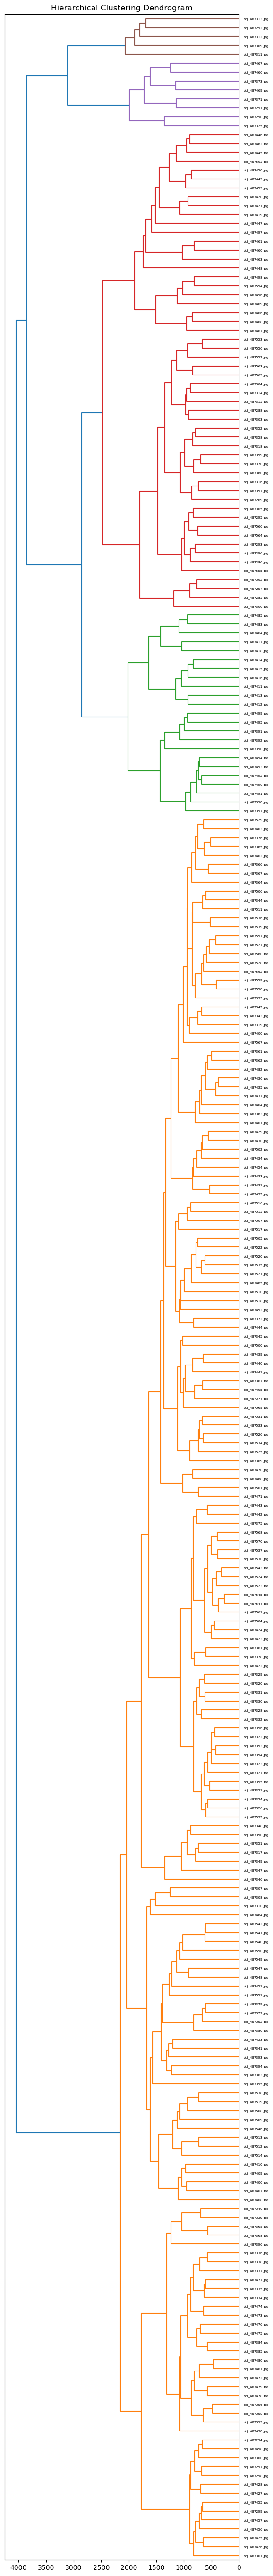

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure().set_figheight(70)

# Compute the linkage matrix
linkage_matrix = linkage(feature_vectors, method='ward')

# Create a dendrogram to visualize the hierarchical structure
dendrogram(linkage_matrix, labels=filenames, orientation="left")

# You can use different parameters for dendrogram visualization to customize it.
plt.title("Hierarchical Clustering Dendrogram")
plt.savefig("test.png")
plt.show()

## Assigning images to Clusters
Need to find a way to automatically determine num_clusters

In [8]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to get flat clusters
num_clusters = 5  # Adjust the number of clusters as needed
cluster_assignments = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# The cluster_assignments contain the cluster labels for each image

In [9]:
print(len(cluster_assignments))
print(cluster_assignments)

286
[2 3 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 4 2 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 5 3 1 3 1 1 1 1 1 1 1 1 3 1 3 1 5 1 3 1 1 1 4 3 3 4 2 1 1 3
 3 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 3 1 1 1 1 1 5 1 3 1 1 1 1 1 1 1 1
 3 1 1 1 1 3 3 1 4 3 1 1 1 1 3 3 1 3 1 3 1 1 3 1 1 3 3 1 1 3 1 3 4 3 2 4 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 3 2 1 2 1 3 3 3 3 1 2 1 1 5 1 1 2 3 1 1
 2 1 1 1 3 1 1 1 1 1 3 1 1 2 1 1 2 2 1 1 3 3 1 1 1 1 1 1 1 3 1 1 1 3 3 3 1
 1 1 3 1 1 2 1 1 1 5 1 1 3 1 1 3 1 1 1 2 1 1 1 4 1 1 1 1 1 1 1 3 1 1 1 2 1
 1 1 1 1 3 1 1 1 1 2 1 1 1 2 1 1 3 1 2 1 1 1 1 3 3 1 1]


## Copying images to respective cluster folder

In [14]:
import shutil

for img, cluster in zip(filenames, cluster_assignments):

    img_path_orig = img_dir + "/" + img
    img_path_copy = img_dir + "/" + str(cluster) + "/" + img
    cluster_dir = img_dir + "/" + str(cluster)

    if not os.path.exists(cluster_dir):
        os.makedirs(cluster_dir)

    shutil.copy(img_path_orig, img_path_copy)


obj_487411.jpg 2
obj_487497.jpg 3
obj_487339.jpg 1
obj_487400.jpg 1
obj_487424.jpg 1
obj_487344.jpg 1
obj_487544.jpg 1
obj_487539.jpg 1
obj_487512.jpg 1
obj_487412.jpg 2
obj_487296.jpg 3
obj_487448.jpg 3
obj_487510.jpg 1
obj_487341.jpg 1
obj_487298.jpg 1
obj_487350.jpg 1
obj_487464.jpg 1
obj_487291.jpg 4
obj_487491.jpg 2
obj_487525.jpg 1
obj_487570.jpg 1
obj_487377.jpg 1
obj_487403.jpg 1
obj_487332.jpg 1
obj_487430.jpg 1
obj_487500.jpg 1
obj_487555.jpg 3
obj_487440.jpg 1
obj_487338.jpg 1
obj_487419.jpg 3
obj_487383.jpg 1
obj_487569.jpg 1
obj_487533.jpg 1
obj_487471.jpg 1
obj_487299.jpg 1
obj_487475.jpg 1
obj_487527.jpg 1
obj_487399.jpg 1
obj_487558.jpg 1
obj_487375.jpg 1
obj_487432.jpg 1
obj_487524.jpg 1
obj_487548.jpg 1
obj_487388.jpg 1
obj_487311.jpg 5
obj_487285.jpg 3
obj_487385.jpg 1
obj_487445.jpg 3
obj_487529.jpg 1
obj_487319.jpg 1
obj_487300.jpg 1
obj_487354.jpg 1
obj_487540.jpg 1
obj_487378.jpg 1
obj_487509.jpg 1
obj_487401.jpg 1
obj_487421.jpg 3
obj_487442.jpg 1
obj_487287.jpg